### CAPITULO 6

#### Graficos 

In [33]:
import pandas as pd
from plotnine import ggplot, aes, geom_histogram, theme, labs

# Cargar los datos del archivo CSV usando ';' como delimitador
file_path_csv = 'C:/Users/HP/Downloads/GaltonFamilies.csv'
galton_data_csv = pd.read_csv(file_path_csv, delimiter=';')

print(galton_data_csv)


     rownames family  father  mother  midparentHeight  children  childNum  \
0           1      1    78.5    67.0            75.43         4         1   
1           2      1    78.5    67.0            75.43         4         2   
2           3      1    78.5    67.0            75.43         4         3   
3           4      1    78.5    67.0            75.43         4         4   
4           5      2    75.5    66.5            73.66         4         1   
..        ...    ...     ...     ...              ...       ...       ...   
929       930    203    62.0    66.0            66.64         3         1   
930       931    203    62.0    66.0            66.64         3         2   
931       932    203    62.0    66.0            66.64         3         3   
932       933    204    62.5    63.0            65.27         2         1   
933       934    204    62.5    63.0            65.27         2         2   

     gender  childHeight  
0      male         73.2  
1    female         6

#### (a) gráficos de distribuição de frequência de alturas, dois países e crianças para avaliar o grau de simetria dos bairros.

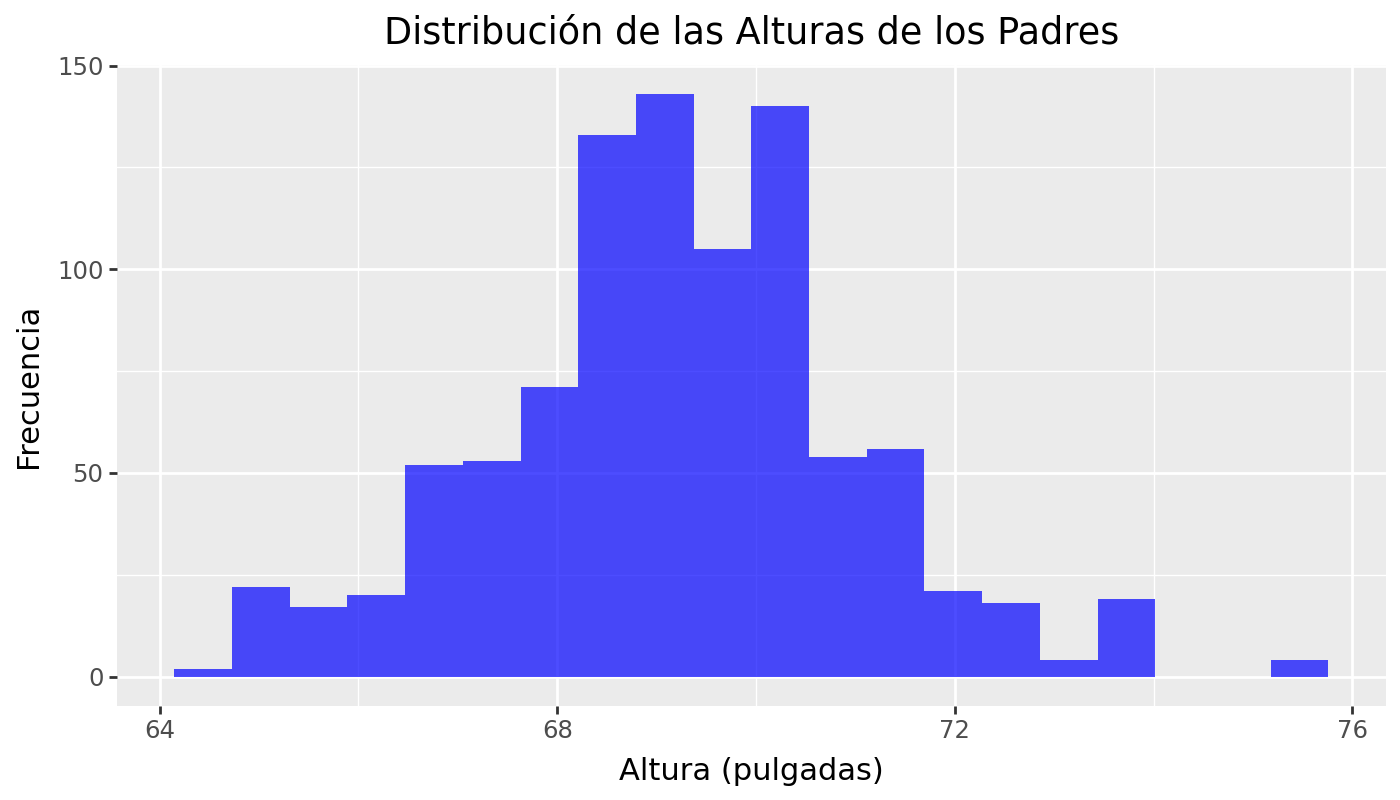

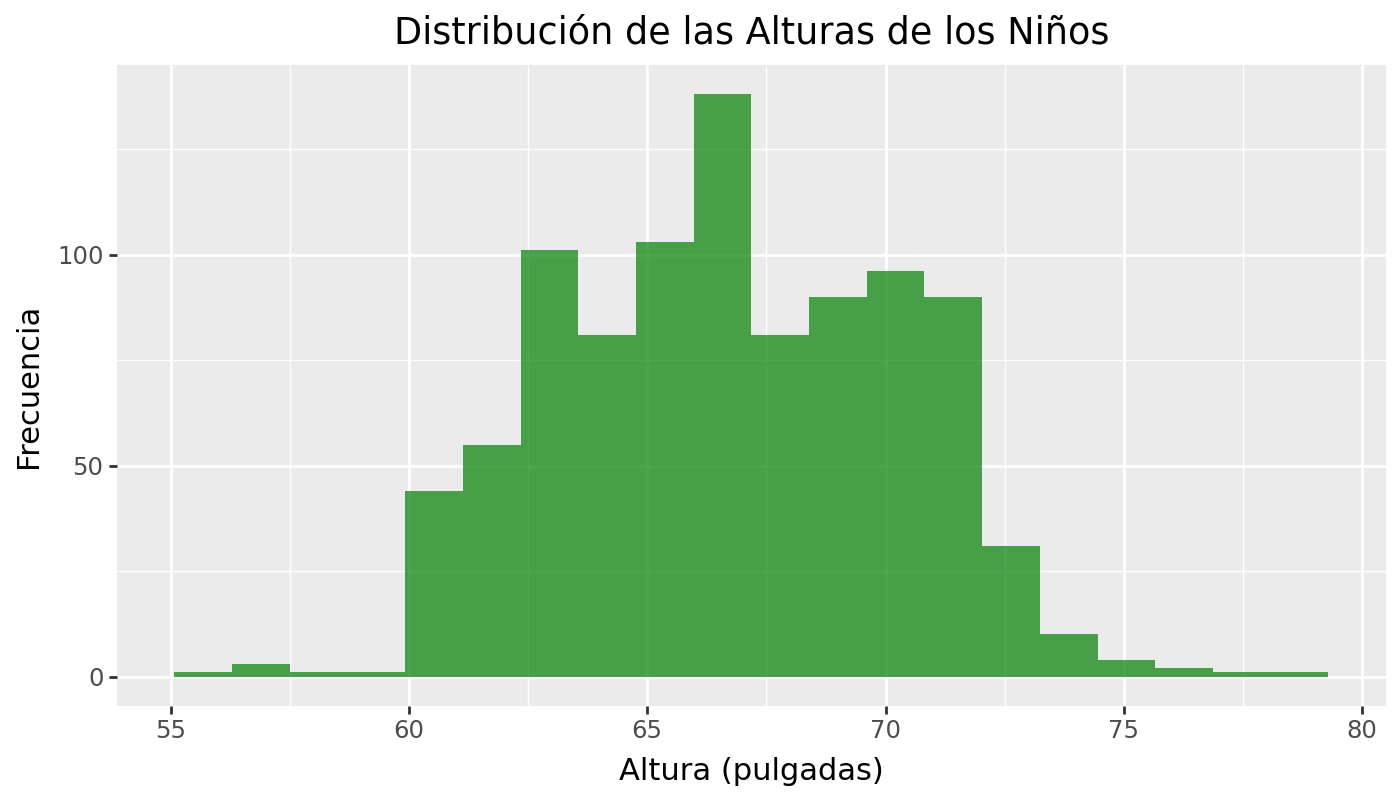

In [15]:
# Gráfico de distribución de las Alturas de los Padres con ggplot
plot_parents = (
    ggplot(galton_data_csv, aes(x='midparentHeight')) +
    geom_histogram(bins=20, fill='blue', alpha=0.7) +
    labs(title='Distribución de las Alturas de los Padres', x='Altura (pulgadas)', y='Frecuencia') +
    theme(
        figure_size=(7, 4)
    )
)

plot_parents.show()

# Gráfico de distribución de las Alturas de los Niños con ggplot
plot_children = (
    ggplot(galton_data_csv, aes(x='childHeight')) +
    geom_histogram(bins=20, fill='green', alpha=0.7) +
    labs(title='Distribución de las Alturas de los Niños', x='Altura (pulgadas)', y='Frecuencia') +
    theme(
        figure_size=(7, 4)
    )
)

plot_children.show()




#### (b) gráficos de distribuição cumulativa de frequências de alturas reprodutivas e dois países para determinar as medianas das duas distribuições.


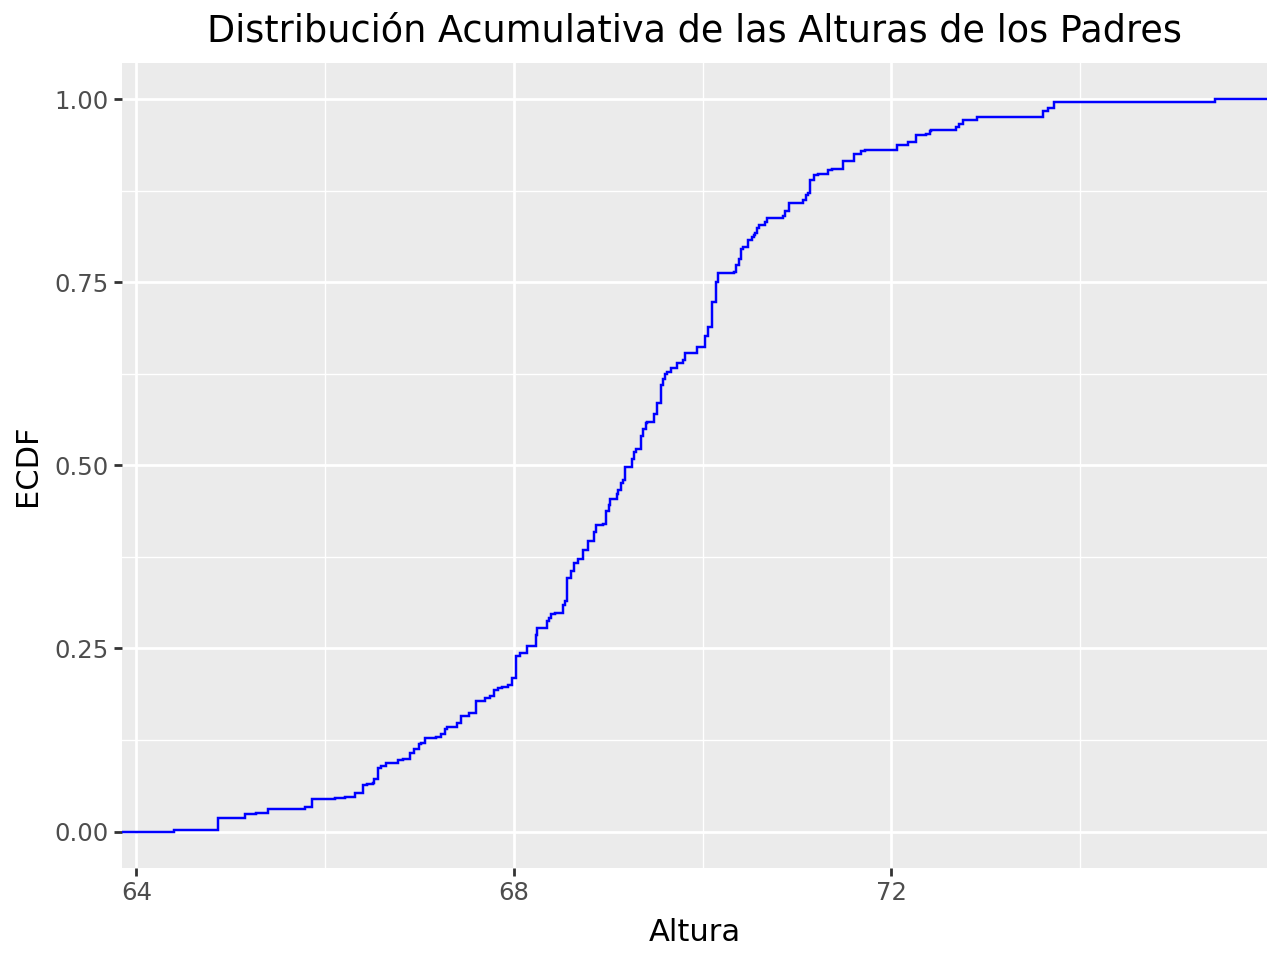

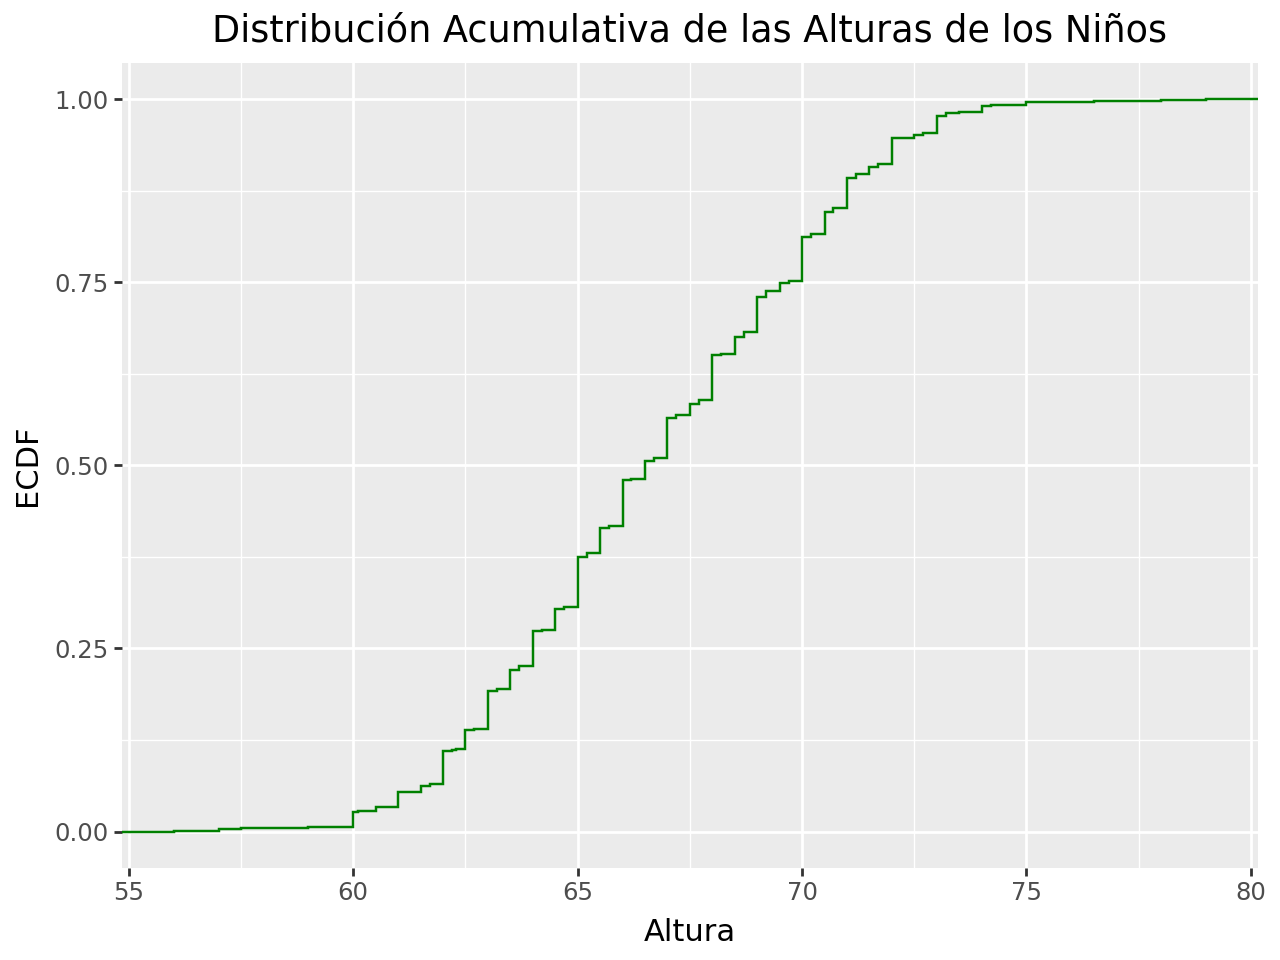

In [21]:
from plotnine import ggplot, aes, stat_ecdf

# Gráfico de distribución acumulativa para las alturas de los padres
ecdf_plot_parents = (
    ggplot(galton_data_csv, aes(x='midparentHeight')) +
    stat_ecdf(geom="step", color='blue') +
    labs(title='Distribución Acumulativa de las Alturas de los Padres', x='Altura', y='ECDF')
)

# Gráfico de distribución acumulativa para las alturas de los niños
ecdf_plot_children = (
    ggplot(galton_data_csv, aes(x='childHeight')) +
    stat_ecdf(geom="step", color='green') +
    labs(title='Distribución Acumulativa de las Alturas de los Niños', x='Altura', y='ECDF')
)

# Dibujar y mostrar los gráficos
ecdf_plot_parents.draw()
ecdf_plot_parents.show()
ecdf_plot_children.draw()
ecdf_plot_children.show()


#### (c) gráficos de caixa para comparar as estatísticas de dois países com cada país.

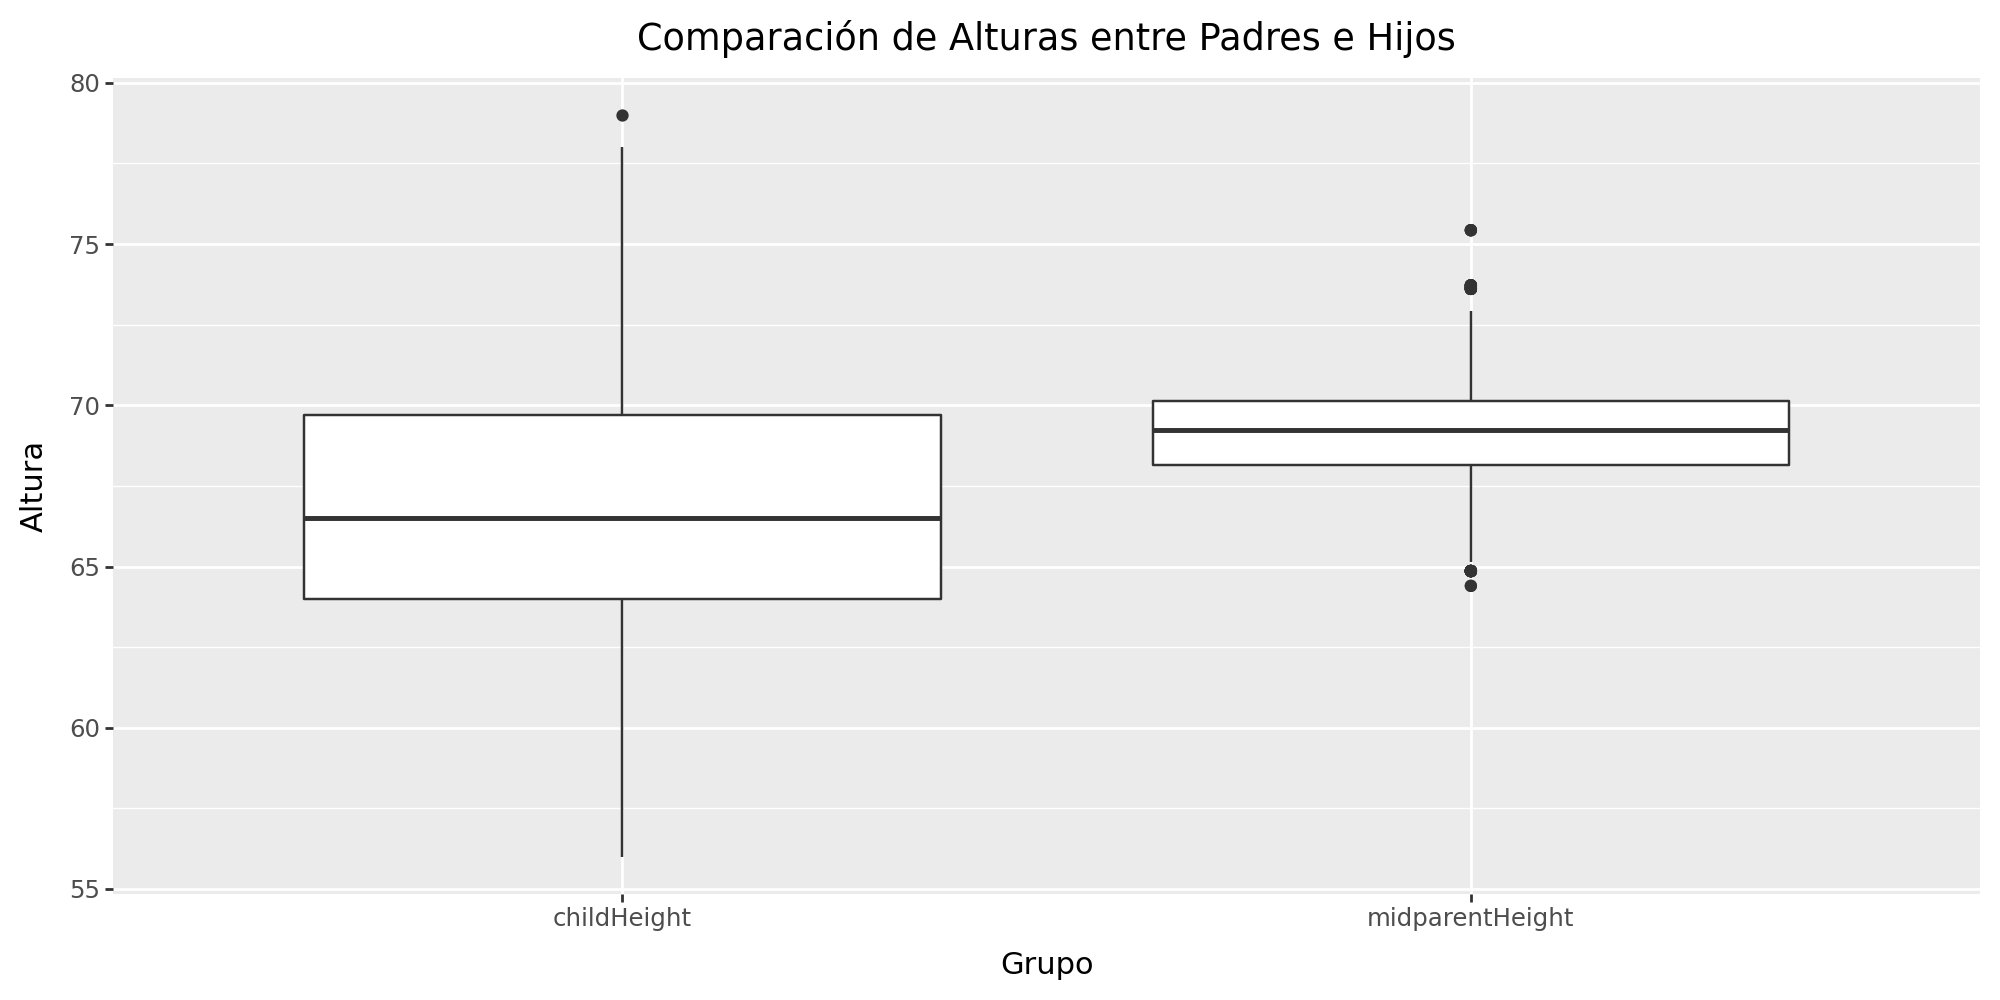

In [29]:
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, theme, labs


# Derretir el DataFrame para tener una columna de variables y una de valores
melted_df = galton_data_csv.melt(value_vars=['midparentHeight', 'childHeight'],
                                 var_name='Group',
                                 value_name='Height')

# Crear el gráfico de caja
boxplot = (
    ggplot(melted_df, aes(x='Group', y='Height')) +
    geom_boxplot() +
    labs(title='Comparación de Alturas entre Padres e Hijos',
         x='Grupo',
         y='Altura') +
    theme(figure_size=(10, 5))
)

# O mostrar el gráfico directamente
boxplot.show()



#### (d) gráficos quantil-quantil para verificar a distribuição de alturas em dois países de acordo com um Distribuição gaussiana.


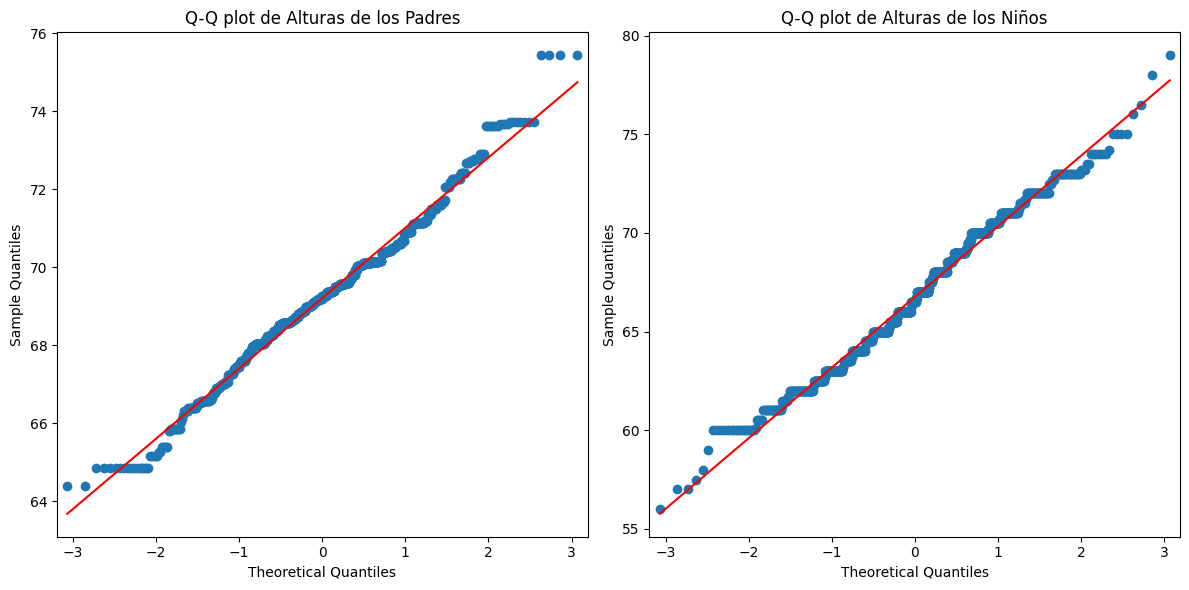

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Gráfico Q-Q para las alturas de los padres
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
qqplot(galton_data_csv['midparentHeight'], line='s', ax=plt.gca())
plt.title('Q-Q plot de Alturas de los Padres')

# Gráfico Q-Q para las alturas de los niños
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
qqplot(galton_data_csv['childHeight'], line='s', ax=plt.gca())
plt.title('Q-Q plot de Alturas de los Niños')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


#### (e) gráfico de dispersão para verificar se houve forte correlação entre as alturas da prole e as alturas dois países

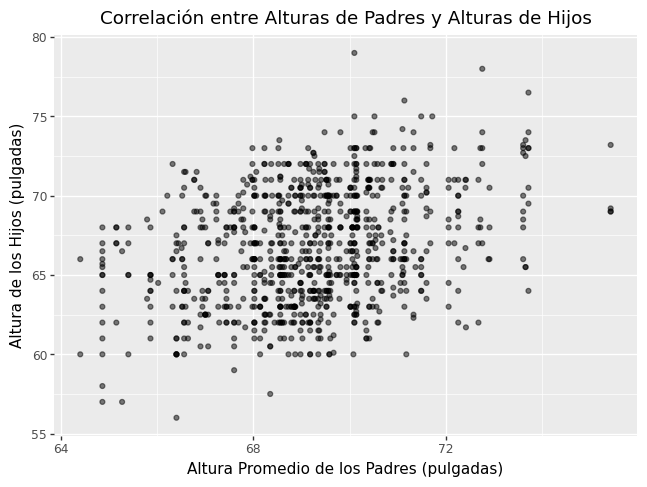

In [34]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs


# Crear el gráfico de dispersión
scatter_plot = (
    ggplot(galton_data_csv, aes(x='midparentHeight', y='childHeight')) +
    geom_point(alpha=0.5) +  # alpha para mejor visualización si hay muchos puntos
    labs(title='Correlación entre Alturas de Padres y Alturas de Hijos',
         x='Altura Promedio de los Padres (pulgadas)',
         y='Altura de los Hijos (pulgadas)')
)

# Mostrar el gráfico
scatter_plot.draw()


#### (f) mapa térmico de dois dados para identificar o número de clusters subjacentes e comparar com o número de grupos de pontos de dados mostrados no gráfico de dispersão ou no item 2e.

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\HP\AppData\Local\Temp\ipykernel_14108\3386754982.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


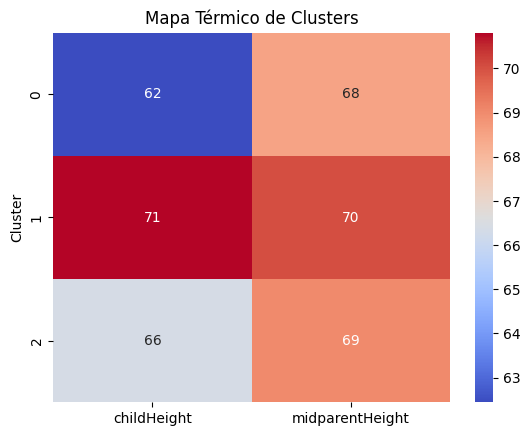

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Consideramos sólo las columnas de interés, por ejemplo, midparentHeight y childHeight
data = galton_data_csv[['midparentHeight', 'childHeight']]

# Aplicar K-Means para identificar clusters
# El número de clusters (n_clusters) puede ajustarse según la observación o evaluación previa
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

# Asignar las etiquetas de cluster al DataFrame original
data['Cluster'] = kmeans.labels_

# Crear un mapa térmico usando el promedio de alturas en cada cluster
pivot_table = data.pivot_table(index='Cluster', values=['midparentHeight', 'childHeight'], aggfunc='mean')
heatmap = sns.heatmap(pivot_table, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Mapa Térmico de Clusters')
plt.show()
